# Part I - Europe Union Happiness Report (2011-2018)
## by (Zainab Shafeeq)

## Introduction

> The **Europe Union Hapiness Report** dataset looks at happiness levels across the europe union between 2011 and 2018. It's like a snapshot of how people in the EU were feeling during those years, and we're going to explore what might have influenced their happiness.

<p>
    <strong>Note</strong>: This data is derived from the <a href='https://worldhappiness.report/data/'>World Happiness Report</a>.
</p>

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
eu_happiness = pd.read_csv('Europe_union_happiness_report_2011_2018.csv')

In [3]:
#inspecting the dataset
eu_happiness.head()

,Unnamed: 0,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,101,Austria,2011,7.471,10.881,0.944,70.0,0.939,0.126,0.703,0.672,0.145
1,102,Austria,2012,7.401,10.884,0.945,70.1,0.920,0.112,0.771,0.712,0.157
2,103,Austria,2013,7.499,10.878,0.950,70.2,0.922,0.163,0.679,0.725,0.163
3,104,Austria,2014,6.950,10.877,0.899,70.3,0.885,0.112,0.567,0.721,0.170
4,105,Austria,2015,7.076,10.876,0.928,70.4,0.900,0.093,0.557,0.748,0.164


In [4]:
eu_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        216 non-null    int64  
 1   Country name                      216 non-null    object 
 2   year                              216 non-null    int64  
 3   Life Ladder                       216 non-null    float64
 4   Log GDP per capita                216 non-null    float64
 5   Social support                    216 non-null    float64
 6   Healthy life expectancy at birth  216 non-null    float64
 7   Freedom to make life choices      216 non-null    float64
 8   Generosity                        216 non-null    float64
 9   Perceptions of corruption         213 non-null    float64
 10  Positive affect                   216 non-null    float64
 11  Negative affect                   216 non-null    float64
dtypes: float

In [14]:
#Describing the dataset
eu_happiness.describe()

,Unnamed: 0,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1046.129630,2014.50000,6.286394,10.542644,0.898250,69.359028,0.783778,-0.030019,0.706019,0.660690,0.253278
std,568.000395,2.29661,0.847525,0.371298,0.056869,2.096227,0.140273,0.166731,0.245945,0.076497,0.063964
min,101.000000,2011.00000,3.875000,9.834000,0.646000,64.500000,0.369000,-0.340000,0.151000,0.490000,0.145000
25%,549.750000,2012.75000,5.711000,10.261000,0.881750,67.770000,0.682250,-0.155000,0.521750,0.600250,0.202000
50%,961.500000,2014.50000,6.232500,10.493500,0.916500,70.167500,0.820500,-0.062000,0.823000,0.659500,0.238000
75%,1689.250000,2016.25000,6.971250,10.815250,0.934000,71.070000,0.904000,0.095250,0.913250,0.726000,0.294000
max,1999.000000,2018.00000,7.858000,11.664000,0.977000,72.200000,0.962000,0.400000,0.977000,0.826000,0.482000


Looks like we have a few missing values...

In [7]:
#Checking for null values
eu_happiness.isnull().sum()

Unnamed: 0                          0
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           3
Positive affect                     0
Negative affect                     0
dtype: int64

Let's locate those missing values to better decide how to handle them.

In [8]:
#Locating missing values by index
eu_happiness[eu_happiness['Perceptions of corruption'].isnull()].index

Index([144, 145, 146], dtype='int64')

In [9]:
eu_happiness.loc[[144, 145, 146]]

,Unnamed: 0,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
144,1314,Malta,2011,6.155,10.402,0.923,70.58,0.882,0.288,NaN,0.638,0.340
145,1315,Malta,2012,5.963,10.433,0.922,70.76,0.861,0.343,NaN,0.639,0.391
146,1316,Malta,2013,6.380,10.473,0.942,70.94,0.909,0.400,NaN,0.629,0.370


Looks like all the missing values in the `Perceptions of corruption` column are within the data entries for **Malta**. 


To handle this, we'll use the average perception of corruption within *Malta itself*. This method is known as **country-specific mean imputation**. It allows us to preserve the unique characteristics of Malta's data and provide a more accurate representation of corruption perception in this particular country.

In [10]:
#Calculating the mean 'Perceptions of corruption' for Malta
malta_mean_corruption = eu_happiness[eu_happiness['Country name'] == 'Malta']['Perceptions of corruption'].mean()

In [12]:
#Filling missing values
eu_happiness.fillna(malta_mean_corruption, inplace=True)

In [13]:
eu_happiness.isnull().sum().sum()

0

In [6]:
#Checking for duplicates
eu_happiness.duplicated().sum()

0

In [16]:
#Dropping unnecessary columns
eu_happiness.drop('Unnamed: 0', axis=1, inplace=True)

### What is the structure of your dataset?

> The dataset is structured as a table, where each row represents a specific EU country in a given year and each column provide a different measure related to happiness.

<p>
    <ol>
        <li><strong>Country name</strong>: The name of the EU country.</li>
        <li><strong>year</strong>: The year of the data collection (2011-2018).</li>
        <li><strong>Life Ladder (Happiness Score)</strong>: The national average response to the Cantril ladder question, where respondents rate their current life on a scale from 0 (worst possible life) to 10 (best possible life).</li>
        <li><strong>Log GDP per capita</strong>: The logarithm of gross domestic product (GDP) per capita in purchasing power parity (PPP) at constant 2017 international dollar prices. This is a measure of a country's economic output per person, adjusted for differences in purchasing power between countries.</li>
        <li><strong> Social support</strong>: The national average of binary responses to the question of having someone to count on in times of trouble.</li>
        <li><strong>Healthy life expectancy at birth</strong>: The average number of years a newborn is expected to live in good health, based on data from the World Health Organization (WHO).</li>
        <li><strong>Freedom to make life choices</strong>: The national average of responses regarding satisfaction with freedom to choose what to do with one's life.</li>
        <li><strong>Generosity</strong>: The residual of regressing the national average of charitable donations on GDP per capita. This measures the level of generosity beyond what would be expected based on a country's wealth.</li>
        <li><strong>Perceptions of corruption</strong>: The national average of responses to questions about the prevalence of corruption in government and business.</li>
        <li><strong>Positive affect</strong>: The average of three positive affect measures: laughter, enjoyment, and doing interesting things.</li>
        <li><strong>Negative affect</strong>: The average of three negative affect measures: worry, sadness, and anger.</li>
    </ol>
</p>

### What is the main feature of interest in your dataset?

> The main feature of interest is the `Life Ladder (Happiness Score)`.

### What features in the dataset do you think will help support your investigation into your feature of interest?

> To really understand what's going on with happiness in the EU, we'll be looking at other features, like `Log GDP per capita`, `Social support`, `Healthy life expectancy at birth`, `Freedom to make life choices`,  `Perceptions of corruption`, and `Positive` and `Negative Affect`.

Before moving on to exploring our variables, let us define a plotting function to *simplify* the process.

In [20]:
def plotting(x_label, y_label, title, legend=False, grid=False):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()

#### *Univariate Exploration*

Let's look at the distribution of happiness scores (Life Ladder) in the Europe Union between 2011 and 2018.

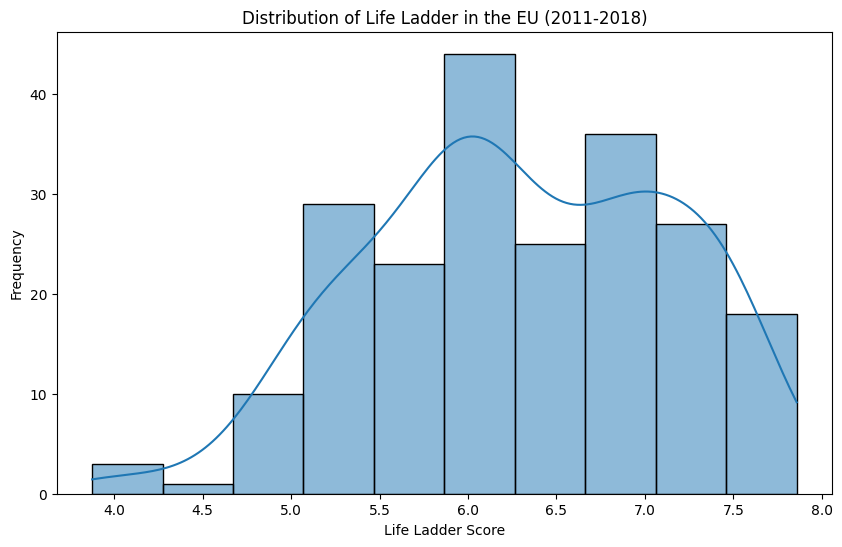

In [21]:
#Plotting a histogram of the Happiness Scores distribution
plt.figure(figsize=(10, 6))
sns.histplot(eu_happiness['Life Ladder'], kde=True)

plotting('Life Ladder Score', 'Frequency', 'Distribution of Life Ladder in the EU (2011-2018)')

The distribution appears roughly normal (bell-shaped), but it also shows signs of slight bimodality. 

Let's investigate this more..

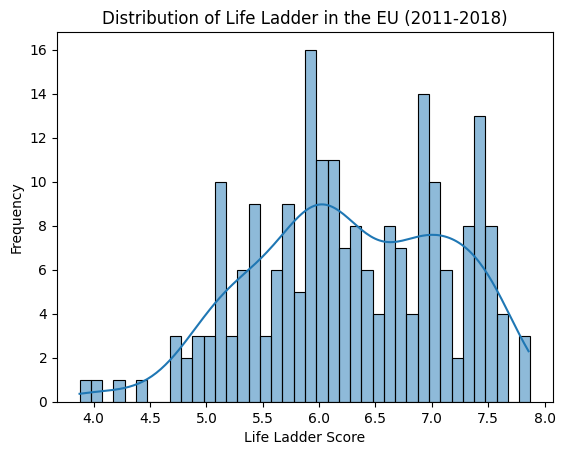

In [23]:
#Creating bins with step-size of 0.10
bins = np.arange(eu_happiness['Life Ladder'].min(), eu_happiness['Life Ladder'].max() + 0.10, 0.10)
sns.histplot(eu_happiness['Life Ladder'], bins=bins, kde=True, edgecolor='black')

#Re-plotting the histogram
plotting('Life Ladder Score', 'Frequency', 'Distribution of Life Ladder in the EU (2011-2018)')

With the two peaks approximately located around 6.0 and 7.0, the histogram still suggests a possible *bimodal distribution*.

____________________________________________________________
Let's pick another variable to dive into..

Let us investigate how many data points fall into different ranges of corruption perception.

Since `Perceptions of corruption` is a continuous variable, we can create categories (bins) to use. This can help with a  different perspective on the distribution.

But first, let's take a look at the unique values of this variable, to better determine how to customize our bar chart's bins!

In [27]:
#Checking for unique values in the 'Perceptions of corruption' column
eu_happiness['Perceptions of corruption'].unique()

array([0.703, 0.771, 0.679, 0.567, 0.557, 0.524, 0.518, 0.523, 0.711,
       0.758, 0.574, 0.512, 0.469, 0.497, 0.543, 0.63 , 0.948, 0.938,
       0.962, 0.955, 0.941, 0.936, 0.911, 0.952, 0.977, 0.924, 0.918,
       0.849, 0.884, 0.892, 0.925, 0.841, 0.871, 0.867, 0.868, 0.893,
       0.898, 0.851, 0.848, 0.95 , 0.957, 0.916, 0.897, 0.886, 0.9  ,
       0.22 , 0.187, 0.17 , 0.237, 0.191, 0.21 , 0.181, 0.151, 0.687,
       0.793, 0.726, 0.652, 0.569, 0.639, 0.668, 0.621, 0.32 , 0.361,
       0.306, 0.265, 0.223, 0.25 , 0.192, 0.199, 0.627, 0.608, 0.699,
       0.656, 0.641, 0.623, 0.601, 0.582, 0.677, 0.566, 0.474, 0.412,
       0.446, 0.414, 0.496, 0.959, 0.93 , 0.824, 0.872, 0.86 , 0.94 ,
       0.912, 0.855, 0.908, 0.59 , 0.573, 0.558, 0.406, 0.409, 0.399,
       0.337, 0.362, 0.933, 0.943, 0.92 , 0.913, 0.903, 0.888, 0.934,
       0.895, 0.837, 0.804, 0.808, 0.798, 0.799, 0.964, 0.956, 0.949,
       0.79 , 0.852, 0.388, 0.403, 0.301, 0.366, 0.375, 0.356, 0.33 ,
       0.385, 0.663,

In [35]:
eu_happiness['Perceptions of corruption'].nunique()

174

In [28]:
#Creating the bins and labels
bins = np.arange(0, 1.1, 0.1)
labels = [f'{i:.1f}-{i+0.1:.1f}' for i in np.arange(0, 1, 0.1)]

Since we're gonna need to add a column for the `Corruption Category`, let's make a copy of the dataset to make sure we don't mess it up.

In [29]:
#Creating a copy of the dataset
eu_happiness_copy = eu_happiness.copy()

In [30]:
#Creating a new column by binning the values from the 'Perceptions of corruption' column
eu_happiness_copy['Corruption Category'] = pd.cut(eu_happiness_copy['Perceptions of corruption'], bins=bins, labels=labels, right=False)

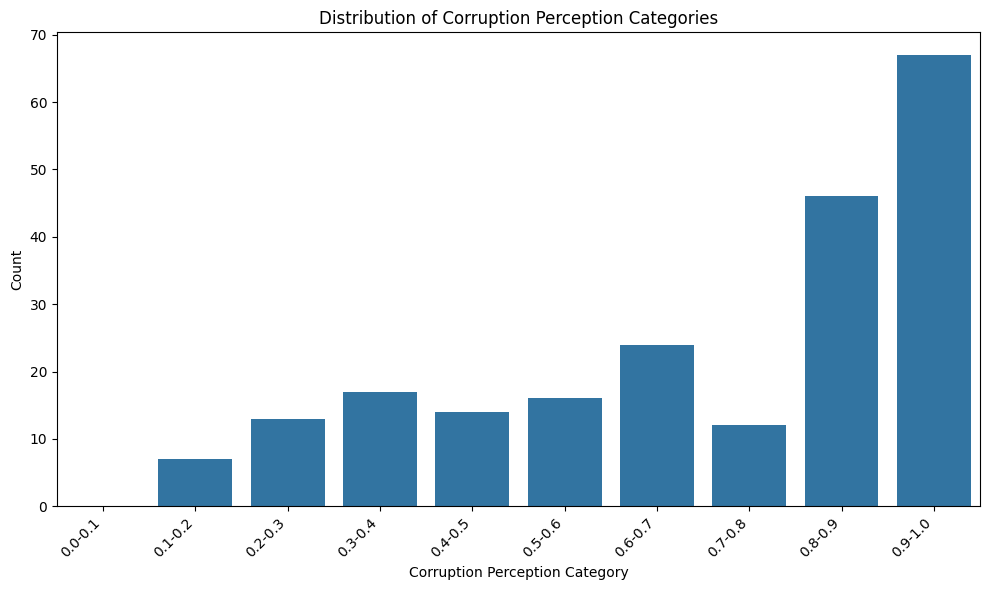

In [34]:
#Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Corruption Category', data=eu_happiness_copy, order=labels)

plt.title('Distribution of Corruption Perception Categories')
plt.xlabel('Corruption Perception Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The distribution of the `Perceptions of corruption` categories shows a distinct trend: there's a general increase in frequency as the perceived corruption levels rise. The highest frequencies are observed in the highest categories, i.e. `'0.8-0.9'` and `'0.9-1.0'`. This indicates that *higher* perceptions of corruption (above 0.8) are **more common** than *lower* perceptions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We investigated the distributions of two key variables: `Life Ladder` (our main variable of interest, representing happiness scores) and `Perceptions of corruption`.

* **Life Ladder**: The distribution of Life Ladder scores is approximately normal with possible bimodality, with two peaks observed around 6.0 and 7.0. There were *no* obvious outliers observed in the distribution and *no* transformations were performed on the Life Ladder data.

* **Perceptions of corruption**: The distribution of `Perceptions of corruption` shows a clear upward trend. Higher perceptions of corruption (above 0.8) are more frequent than lower perceptions. The highest frequencies are observed in the `'0.8-0.9'` and `'0.9-1.0'` categories. This distribution is definitely *not normal*; as it's heavily skewed towards higher perceived corruption. *No* transformations were performed on the `perceptions of corruption` data, but we *binned* it into categories to make it suitable for a bar chart representation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes! we observed an unusual distribution in `Perceptions of corruption`. It's heavily *skewed* towards higher perceived corruption, showing that higher perceptions of corruption are more common in this dataset. The potential bimodality of the `Life Ladder` distribution is also an interesting observation that warrants further investigation.

We performed **one key operation** on the data:

* **Binning of "Perceptions of corruption"**: Because `Perceptions of corruption` has a high number of unique values (174) making it *unsuitable* for a direct bar chart representation, we binned the continuous values into 10 categories (0.0-0.1, 0.1-0.2, ..., 0.9-1.0). This transformation was necessary to create a meaningful bar chart that effectively communicates the distribution of perceived corruption.

#### *Bivariate Exploration*

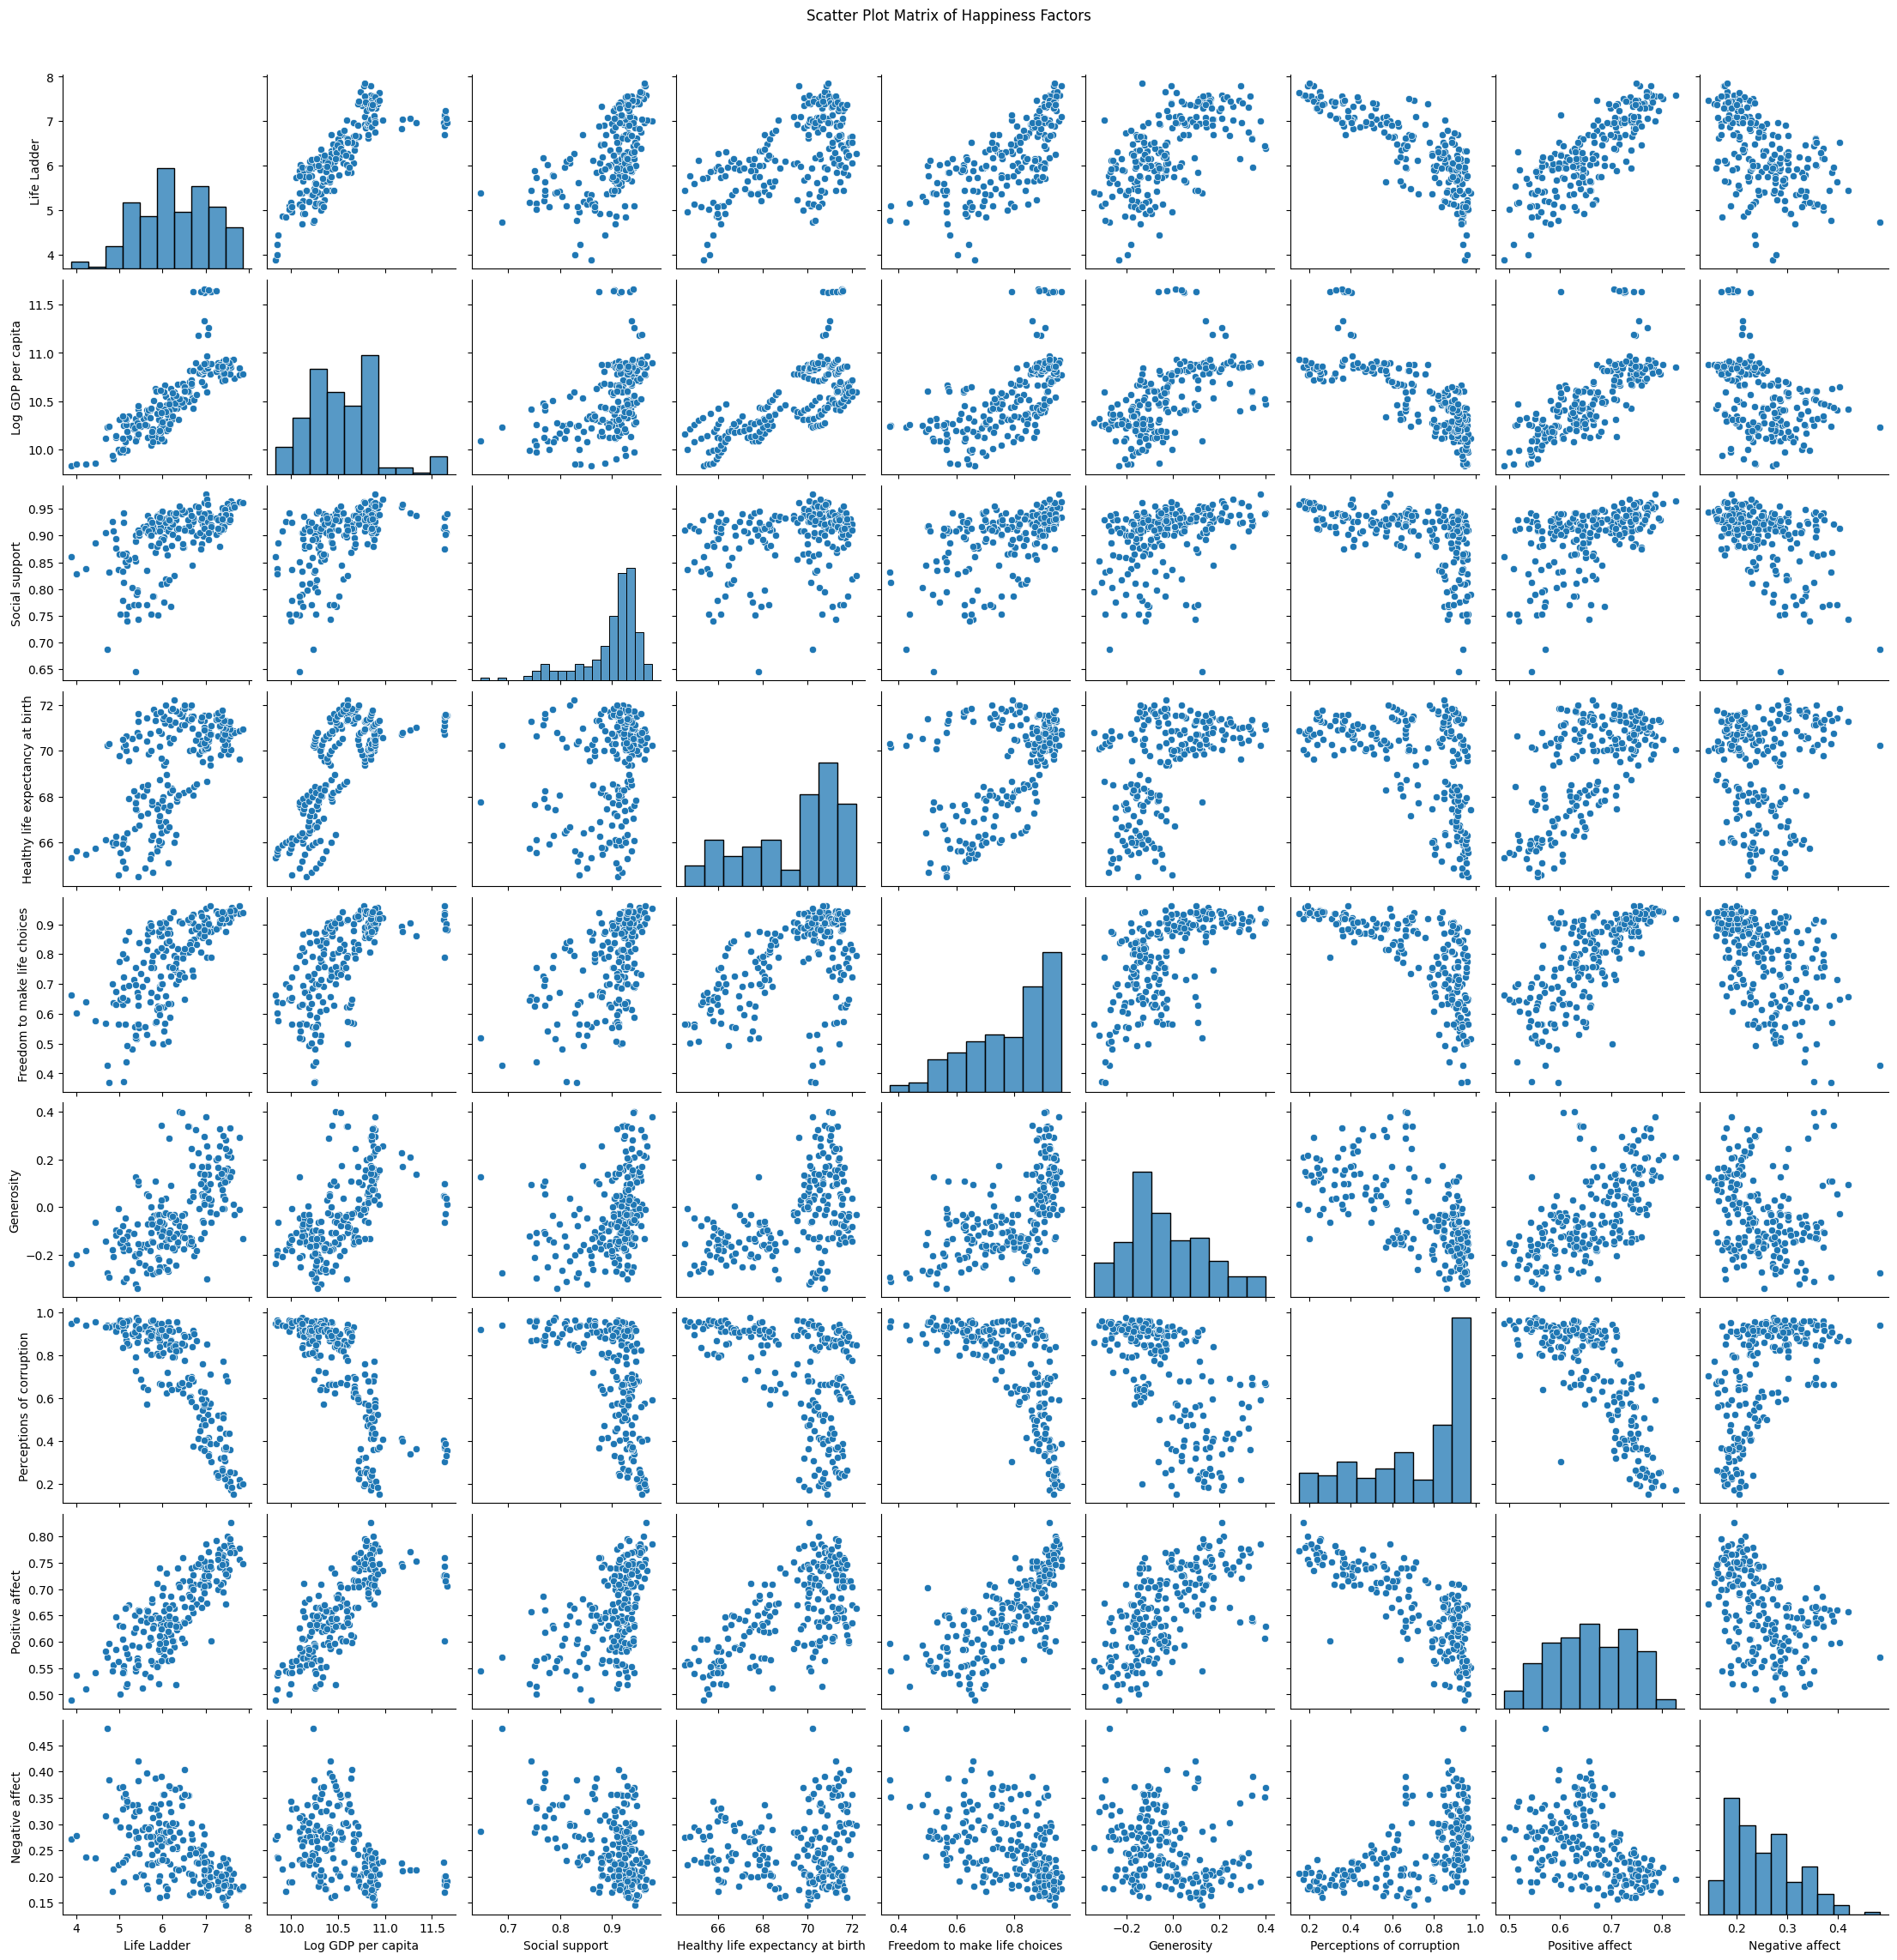

In [39]:
#Filtering the numerical columns
numerical_cols = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
matrix = eu_happiness[numerical_cols]

#Creating the scatter plot matrix
sns.pairplot(matrix)
plt.suptitle('Scatter Plot Matrix of Happiness Factors', y=1.02)
plt.show()

However, before diving into the distinct relationships between `Life Ladder` and other variables, let's take a look at how average happiness has changed over the years 2011-2018 in the EU.

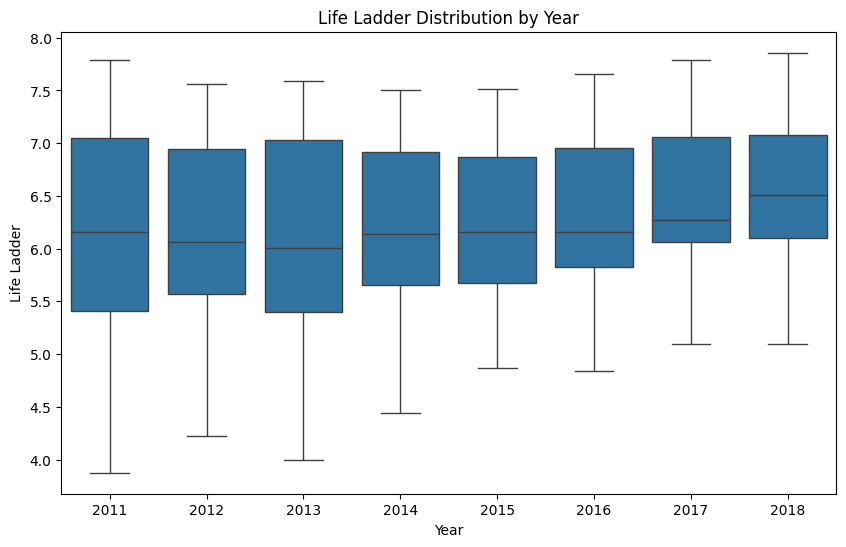

In [40]:
#Plotting a Boxplot of Life Ladder by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Life Ladder', data=eu_happiness)

plotting('Year', 'Life Ladder', 'Life Ladder Distribution by Year')

The most significant observation the above plot reveals is a relatively **stable median** across the years 2011-2018. This suggests that the central tendency of happiness within the EU has not changed dramatically over this period.

In addition, the interquartile range (IQR), represented by the height of the boxes, shows some variation. The IQR is wider in some years than in others. A wider IQR indicates *greater spread* in happiness scores across countries within that year.

_____________________________________________________________

After examining the distribution of `Life Ladder` scores, we observed a potentially bimodal distribution, suggesting the possible presence of distinct groups within the EU. This drives our attention to investigating how `Life Ladder` relates to *other factors*. 

Let us investigate the relationships between our main variable of interest, `Life Ladder`, and several other variables within the EU!

_____________________________________________________________
Let's go back to the scatter plot matrix. We will plot **two** scatter plots, one with a positive correlation with `Life Ladder` and another one with a negative correlation.

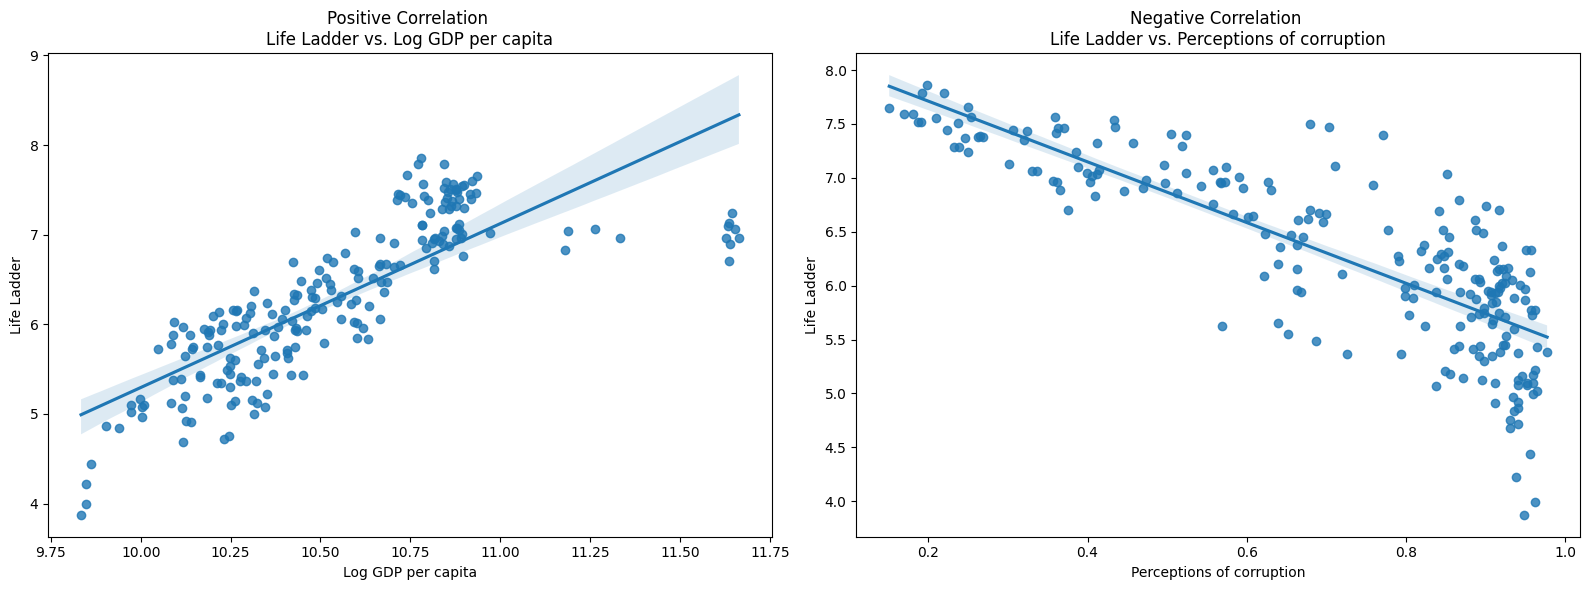

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot 1: Life Ladder vs. Log GDP per capita
sns.regplot(ax=axes[0], x='Log GDP per capita', y='Life Ladder', data=eu_happiness)
axes[0].set_title('Positive Correlation \nLife Ladder vs. Log GDP per capita')
axes[0].set_xlabel('Log GDP per capita')
axes[0].set_ylabel('Life Ladder')

# Scatter plot 2: Life Ladder vs. Perceptions of corruption
sns.regplot(ax=axes[1], x='Perceptions of corruption', y='Life Ladder', data=eu_happiness)
axes[1].set_title('Negative Correlation \nLife Ladder vs. Perceptions of corruption')
axes[1].set_xlabel('Perceptions of corruption')
axes[1].set_ylabel('Life Ladder')

plt.tight_layout()
plt.show()

The scattered, weak negative relationship between `Life Ladder` and the `Perceptions of corruption` seems interesting to investigate further...

And since we've already binned `Perceptions of Corruption` in our univariate exploration, we can now use this categorical variable in a bivariate visualization with `Life Ladder`.

So, let's do this!

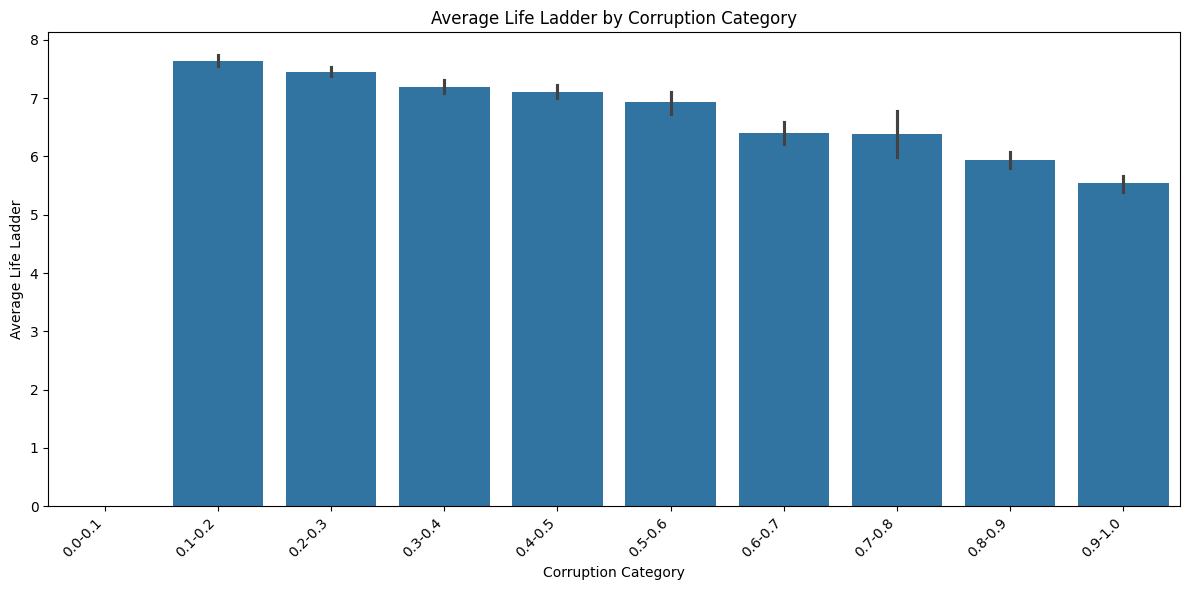

In [44]:
#Plotting a Clustered Bar Chart of Average Life Ladder vs. Corruption Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Corruption Category', y='Life Ladder', data=eu_happiness_copy, order=labels)

plt.title('Average Life Ladder by Corruption Category')
plt.xlabel('Corruption Category')
plt.ylabel('Average Life Ladder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart demonstrates a clear **downward trend** in average Life Ladder scores as the perceived corruption category increases. Countries with the lowest perceived corruption (0.0-0.1 category) exhibit the *highest* average Life Ladder scores, while countries with the highest perceived corruption (0.9-1.0 category) have the *lowest* average Life Ladder scores. This indicates a **strong negative** association: higher levels of perceived corruption are associated with lower average happiness levels.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature of interest vary with other features in the dataset?

> `Life Ladder` varied positively with `Log GDP per capita` and negatively with `Perceptions of corruption`. The relationship with `GDP per capita` appears **stronger** than the relationship with `Perceptions of corruption`. `Life Ladder` remained relatively stable across the years studied, although there was some variation in the *spread* of happiness scores.

### Did you observe any interesting relationships between the other features (not the main feature of interest)?

> While our primary focus was on the relationship between Life Ladder and other variables, the scatter plot matrix likely showed potential relationships between the *other* features as well.

Some examples of the positive relationships are the following:

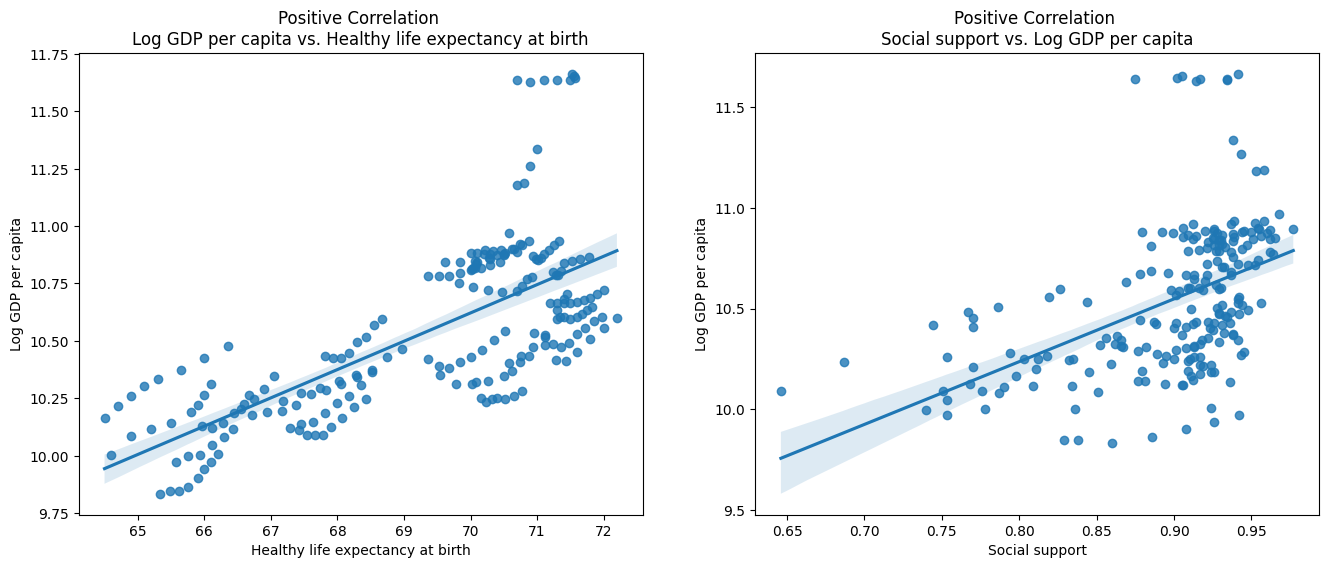

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Healthy life expectancy at birth vs. Log GDP per capita
sns.regplot(ax=axes[0], x='Healthy life expectancy at birth', y='Log GDP per capita', data=eu_happiness)
axes[0].set_title('Positive Correlation \nLog GDP per capita vs. Healthy life expectancy at birth')
axes[0].set_xlabel('Healthy life expectancy at birth')
axes[0].set_ylabel('Log GDP per capita')

#Social support vs. Log GDP per capita
sns.regplot(ax=axes[1], x='Social support', y='Log GDP per capita', data=eu_happiness)
axes[1].set_title('Positive Correlation \nSocial support vs. Log GDP per capita')
axes[1].set_xlabel('Social support')
axes[1].set_ylabel('Log GDP per capita')

plt.show()

On the other hand, examples of the negative relationships are:

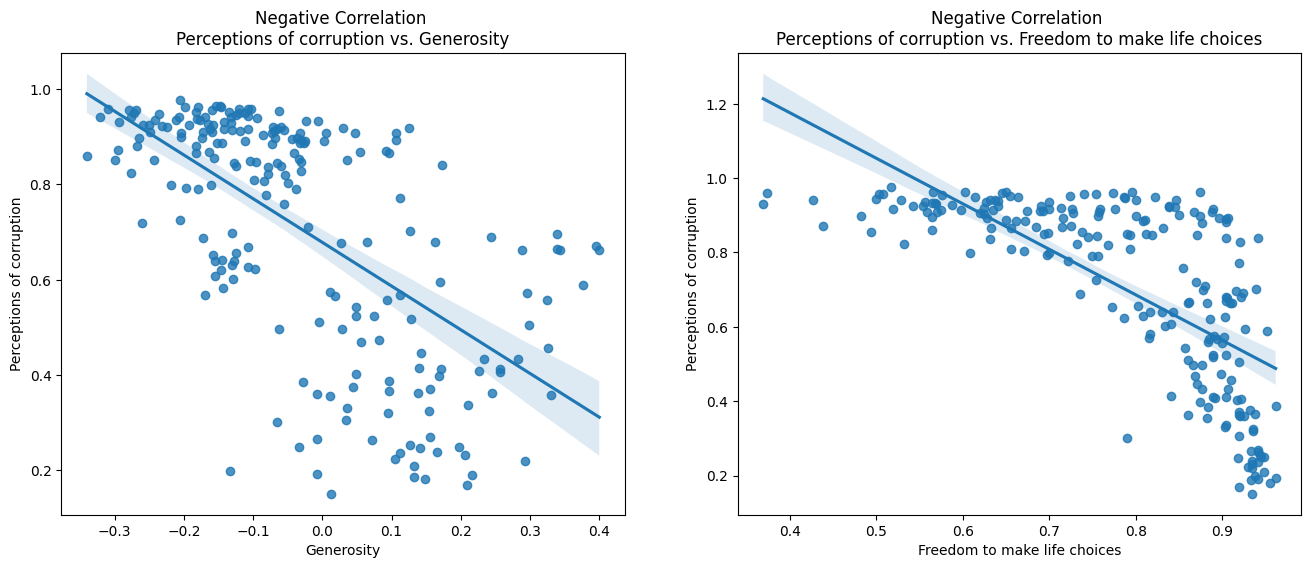

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Perceptions of corruption vs. Generosity
sns.regplot(ax=axes[0], x='Generosity', y='Perceptions of corruption', data=eu_happiness)
axes[0].set_title('Negative Correlation \nPerceptions of corruption vs. Generosity')
axes[0].set_xlabel('Generosity')
axes[0].set_ylabel('Perceptions of corruption')

#Perceptions of corruption vs. Freedom to make life choices
sns.regplot(ax=axes[1], x='Freedom to make life choices', y='Perceptions of corruption', data=eu_happiness)
axes[1].set_title('Negative Correlation \nPerceptions of corruption vs. Freedom to make life choices')
axes[1].set_xlabel('Freedom to make life choices')
axes[1].set_ylabel('Perceptions of corruption')

plt.show()

#### *Multivariate Exploration*

For our Multivariate Exploration, the positive relationship between `Life Ladder` and `Log GDP per capita`, uncovered during our Bivariate Exploration, seems like the perfect starting point!

Adding up the affects of other variables, let's investigate it more!

______________________________________________________________
Let us start by uncovering how the relationship between `Log GDP per capita` and `Life Ladder` vary across the years. 

To do this, we will plot a scatterplot. However, we'are gonna need to make use of some multiple encodings...

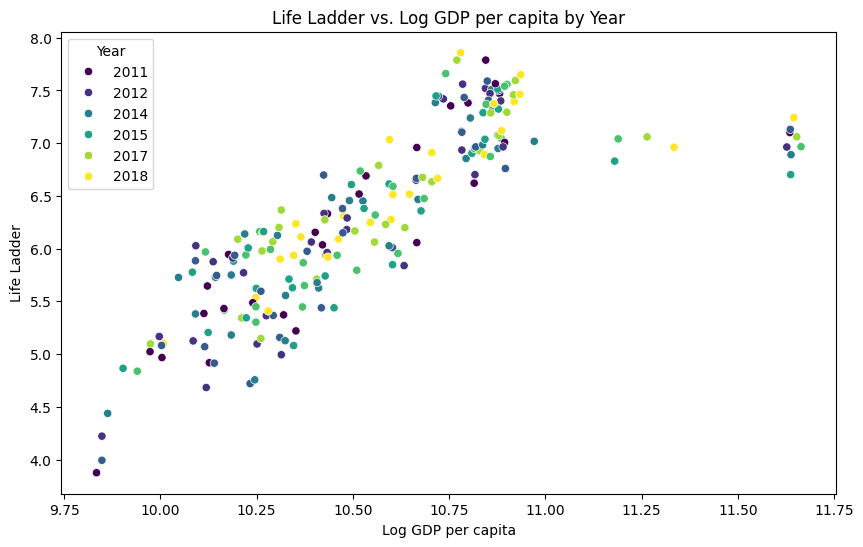

In [58]:
#Plotting a Scatterplot of Life Ladder vs. Log GDP per capita by Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='Life Ladder', hue='year', data=eu_happiness, palette='viridis')

plt.title('Life Ladder vs. Log GDP per capita by Year')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.legend(title='Year')
plt.show()

While the general trend is consistent, there appear to be some *subtle shifts* in the distribution of points over time. It's not a dramatic change, but there's a slight tendency for points to shift *upwards* and perhaps *slightly to the right* in later years (2017 and 2018), especially for countries with lower to mid-range GDP per capita. This could suggest a slight improvement in overall happiness scores over time, even within **similar GDP levels**.

______________________________________________________________
Another variable of interest we could add up to our exploration is the levels of `perceived corruption`. Therefore, let's investigate how the relationship between `Log GDP per capita` and `Life Ladder` vary across the different levels.

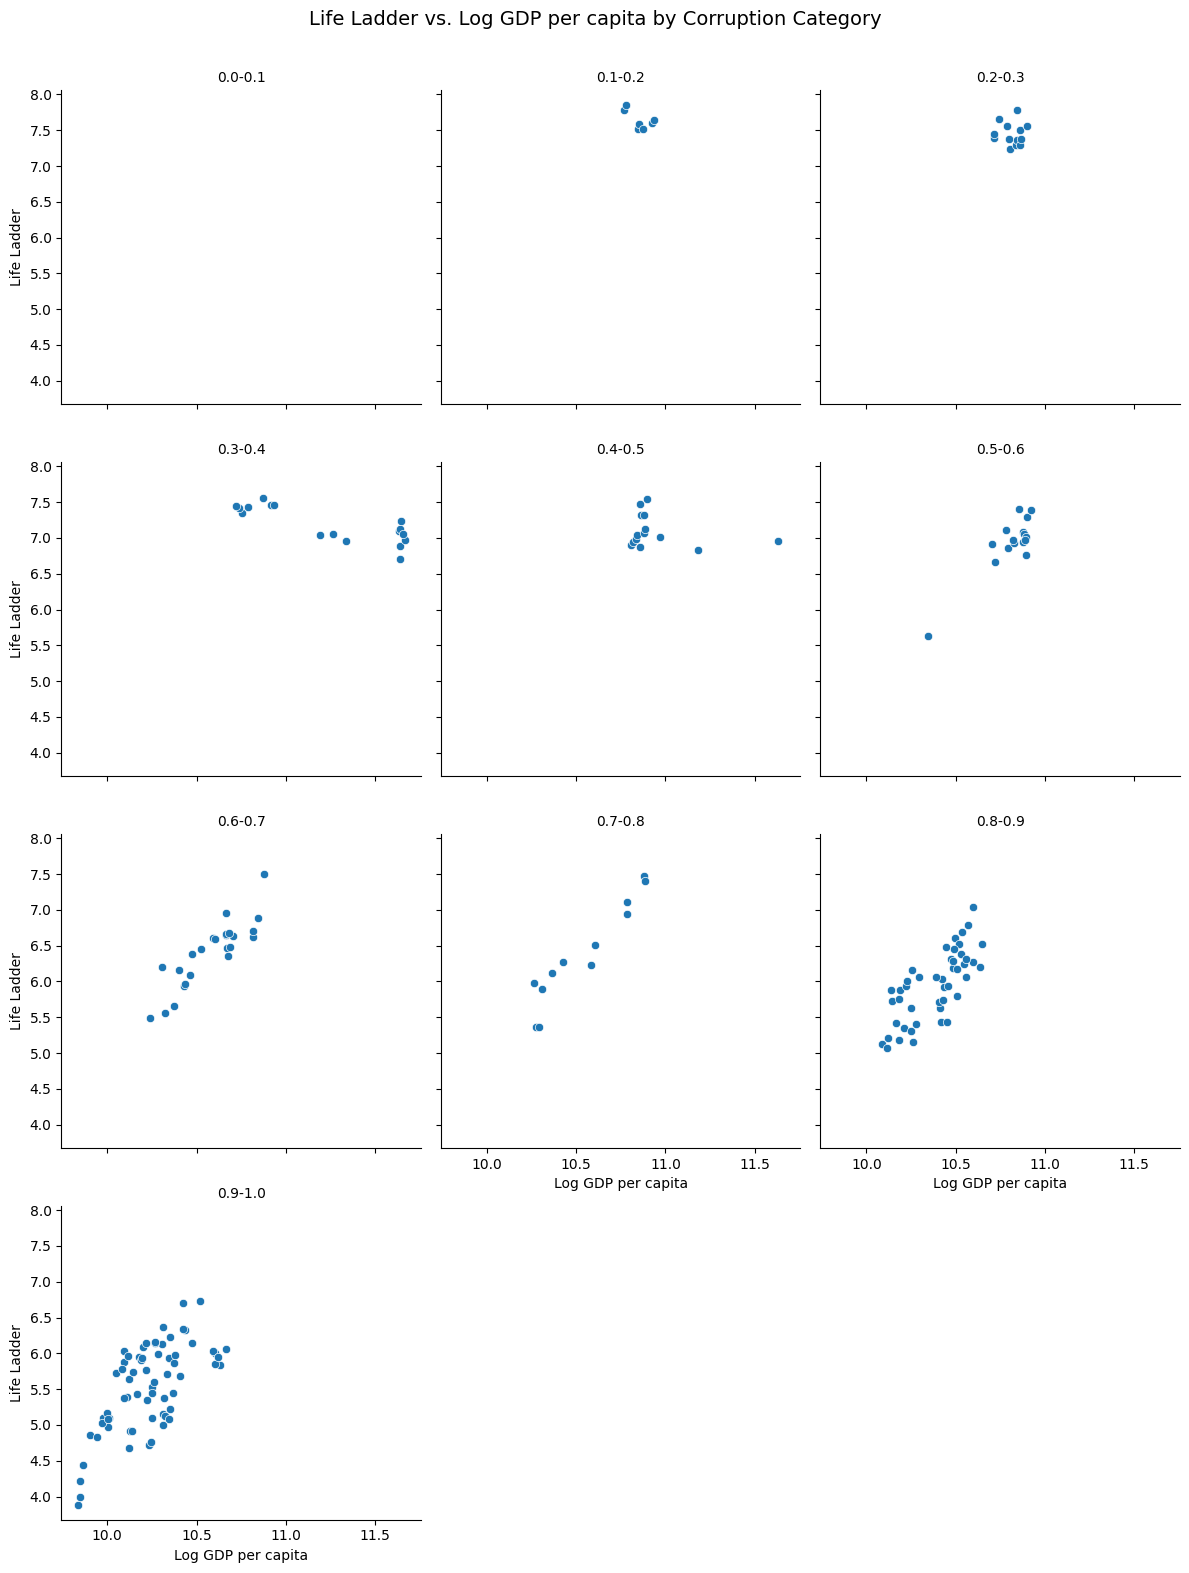

In [63]:
#Plotting a FacetGrid of Life Ladder vs. Log GDP per capita by Corruption Category
g = sns.FacetGrid(eu_happiness_copy, col='Corruption Category', col_wrap=3, height=4, aspect=1)
g.map(sns.scatterplot, 'Log GDP per capita', 'Life Ladder')
g.set_axis_labels("Log GDP per capita", "Life Ladder")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Life Ladder vs. Log GDP per capita by Corruption Category\n\n', fontsize=14)

plt.tight_layout()
plt.show()

Across almost all facets (corruption categories), there's a general positive relationship between `Log GDP per capita` and `Life Ladder`. This confirms that higher `GDP per capita` is generally associated with higher happiness, regardless of the `perceived corruption` level.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature of interest?

> After examining how the relationship between `Life Ladder` and `Log GDP per capita` was influenced by two other factors: `year` and `Perceptions of corruption`, here are what we observed:

1. **Life Ladder, Log GDP per capita, and Year**: We observed that the established positive relationship between `Life Ladder` and `Log GDP per capita` *persisted* across *all years*. However, there was a subtle temporal shift.

2. **Life Ladder, Log GDP per capita, and Perceptions of corruption**: We found that the positive relationship between Life Ladder and Log GDP per capita is present across different levels of perceived corruption. This means that even in countries with *high* corruption, there is still a tendency for wealthier countries to be happier.

### Were there any interesting or surprising interactions between features?

> The most interesting interaction is the moderating effect of `Perceptions of corruption` on the relationship between `Log GDP per capita` and `Life Ladder`. The subtle upward shift in happiness scores over time (observed when considering `Year`) is also an interesting interaction.

## Conclusions

> This data exploration aimed to investigate the factors associated with happiness, as measured by the `Life Ladder` score, within EU countries between 2011 and 2018. We employed a systematic approach, beginning with univariate analysis to understand the distributions of individual variables, followed by bivariate and multivariate analyses to explore relationships between them.

* **Life Ladder Distribution**: The distribution of `Life Ladder` scores suggested potential bimodality, hinting at the possible existence of distinct groups of countries within the EU.

* **Log GDP per capita and Life Ladder**: A clear positive relationship was found between `Log GDP per capita` and `Life Ladder`. *Wealthier* countries generally reported *higher* happiness scores.

* **Perceptions of corruption and Life Ladder**: A negative relationship was observed between `Perceptions of corruption` and `Life Ladder`. *Higher* perceived corruption was associated with *lower* happiness scores.

* **Temporal Shifts in Happiness**: There was evidence of a slight upward shift in happiness scores over time.

* **Moderating Effect of Corruption**: Our multivariate analysis suggested that `perceived corruption` might *moderate* the relationship between `Log GDP per capita` and `Life Ladder`.